# **1. Importing required Libraries**

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# **2. Load the dataset to a variable**

In [98]:
data = pd.read_csv('/content/hmeq.csv')

In [99]:
#copy the data to another variable to keep the orignal format for any revisit to cross the data modified or to reuse the orignal
same_data = data.copy()

In [100]:
#list the first five rows
data.head()

BAD  LOAN   MORTDUE      VALUE   REASON     JOB    YOJ  DEROG  DELINQ  \
0    1  1100 25860.000  39025.000  HomeImp   Other 10.500  0.000   0.000   
1    1  1300 70053.000  68400.000  HomeImp   Other  7.000  0.000   2.000   
2    1  1500 13500.000  16700.000  HomeImp   Other  4.000  0.000   0.000   
3    1  1500       NaN        NaN      NaN     NaN    NaN    NaN     NaN   
4    0  1700 97800.000 112000.000  HomeImp  Office  3.000  0.000   0.000   

    CLAGE  NINQ   CLNO  DEBTINC  
0  94.367 1.000  9.000      NaN  
1 121.833 0.000 14.000      NaN  
2 149.467 1.000 10.000      NaN  
3     NaN   NaN    NaN      NaN  
4  93.333 0.000 14.000      NaN

In [101]:
#display last five rows
data.tail()

BAD   LOAN   MORTDUE     VALUE   REASON    JOB    YOJ  DEROG  DELINQ  \
5955    0  88900 57264.000 90185.000  DebtCon  Other 16.000  0.000   0.000   
5956    0  89000 54576.000 92937.000  DebtCon  Other 16.000  0.000   0.000   
5957    0  89200 54045.000 92924.000  DebtCon  Other 15.000  0.000   0.000   
5958    0  89800 50370.000 91861.000  DebtCon  Other 14.000  0.000   0.000   
5959    0  89900 48811.000 88934.000  DebtCon  Other 15.000  0.000   0.000   

       CLAGE  NINQ   CLNO  DEBTINC  
5955 221.809 0.000 16.000   36.112  
5956 208.692 0.000 15.000   35.860  
5957 212.280 0.000 15.000   35.557  
5958 213.893 0.000 16.000   34.341  
5959 219.601 0.000 16.000   34.572

In [102]:
#Display the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [103]:
#display null count from dataset
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [104]:
#display the min max values column entries with transforming columns to rows
data.describe().T

count       mean       std      min       25%       50%        75%  \
BAD     5960.000      0.199     0.400    0.000     0.000     0.000      0.000   
LOAN    5960.000  18607.970 11207.480 1100.000 11100.000 16300.000  23300.000   
MORTDUE 5442.000  73760.817 44457.609 2063.000 46276.000 65019.000  91488.000   
VALUE   5848.000 101776.049 57385.775 8000.000 66075.500 89235.500 119824.250   
YOJ     5445.000      8.922     7.574    0.000     3.000     7.000     13.000   
DEROG   5252.000      0.255     0.846    0.000     0.000     0.000      0.000   
DELINQ  5380.000      0.449     1.127    0.000     0.000     0.000      0.000   
CLAGE   5652.000    179.766    85.810    0.000   115.117   173.467    231.562   
NINQ    5450.000      1.186     1.729    0.000     0.000     1.000      2.000   
CLNO    5738.000     21.296    10.139    0.000    15.000    20.000     26.000   
DEBTINC 4693.000     33.780     8.602    0.524    29.140    34.818     39.003   

               max  
BAD          1.000  
LOAN     89900.000  
MORTDUE 399550.000  
VALUE   855909.000  
YOJ         41.000  
DEROG       10.000  
DELINQ      15.000  
CLAGE     1168.234  
NINQ        17.000  
CLNO        71.000  
DEBTINC    203.312

In [105]:
# Display null count in percentage
data.isnull().sum()/len(data)*100

BAD        0.000
LOAN       0.000
MORTDUE    8.691
VALUE      1.879
REASON     4.228
JOB        4.681
YOJ        8.641
DEROG     11.879
DELINQ     9.732
CLAGE      5.168
NINQ       8.557
CLNO       3.725
DEBTINC   21.258
dtype: float64

In [106]:
data.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [107]:
# Check for NaN values
print("NaN values in the dataset:")
print(data.isna().sum())

NaN values in the dataset:
BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


**Insights**:


1. There are 5960 rows each one them with 13 column
2. There are rows with missing values (Nan).
3.  5 columns (Value, Reason, Job, Clage, CLNO) have around 5% of missing values.
4. 4 columns (Mortdue, Yog, Delinq, Ninq) have around 10% of missing values.
5. 1 column (Debtinc) has more than 20% of missing values.
6. In total, 11 of 13 columns have missing values.

# **3.Convert the data types**

In [108]:
cols = data.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is a classification problem and the target variable is categorical

cols.append('BAD')

In [109]:
cols

['REASON', 'JOB', 'BAD']

In [110]:
for col in cols:
  data[col] = data[col].astype('category')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [112]:
#Analyze after data type modifications
data.describe(include= 'category').T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

In [113]:
# Analyzing the summary statistics for numerical variables

num_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data[num_cols].describe().T

count       mean       std      min       25%       50%        75%  \
LOAN    5960.000  18607.970 11207.480 1100.000 11100.000 16300.000  23300.000   
MORTDUE 5442.000  73760.817 44457.609 2063.000 46276.000 65019.000  91488.000   
VALUE   5848.000 101776.049 57385.775 8000.000 66075.500 89235.500 119824.250   
YOJ     5445.000      8.922     7.574    0.000     3.000     7.000     13.000   
DEROG   5252.000      0.255     0.846    0.000     0.000     0.000      0.000   
DELINQ  5380.000      0.449     1.127    0.000     0.000     0.000      0.000   
CLAGE   5652.000    179.766    85.810    0.000   115.117   173.467    231.562   
NINQ    5450.000      1.186     1.729    0.000     0.000     1.000      2.000   
CLNO    5738.000     21.296    10.139    0.000    15.000    20.000     26.000   
DEBTINC 4693.000     33.780     8.602    0.524    29.140    34.818     39.003   

               max  
LOAN     89900.000  
MORTDUE 399550.000  
VALUE   855909.000  
YOJ         41.000  
DEROG       10.000  
DELINQ      15.000  
CLAGE     1168.234  
NINQ        17.000  
CLNO        71.000  
DEBTINC    203.312

In [114]:
cols_cat = data.select_dtypes(['category']).columns.tolist()
cols_cat

['BAD', 'REASON', 'JOB']

In [115]:
for i in cols_cat:
  print(data[i].value_counts(normalize=True))
  print('\n')

BAD
0   0.801
1   0.199
Name: proportion, dtype: float64


REASON
DebtCon   0.688
HomeImp   0.312
Name: proportion, dtype: float64


JOB
Other     0.420
ProfExe   0.225
Office    0.167
Mgr       0.135
Self      0.034
Sales     0.019
Name: proportion, dtype: float64




# **4. Exploratory Data Analysis (EDA) and Visualization**

### **4.1 Univariate Analysis**

###  1. Function for stacked bar char

In [116]:
def histogram_boxpolt(data, feature, figsize=(7,6), kde=True, bins=None):
    import matplotlib.pyplot as plt
    figure, (ax_box, ax_hist ) = plt.subplots(2, sharex=True, figsize=figsize)
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans = True, color = 'violet')

    if bins == None:
      sns.histplot(data=data, x=feature, ax=ax_hist)
    else:
      sns.histplot(data=data, x=feature, ax=ax_hist, kde=kde, bins=bins)

    ax_hist.axvline(data[feature].mean(), color='red', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='green', linestyle='-')

### 1.2. **Univariate Analysis - Numerical Data**

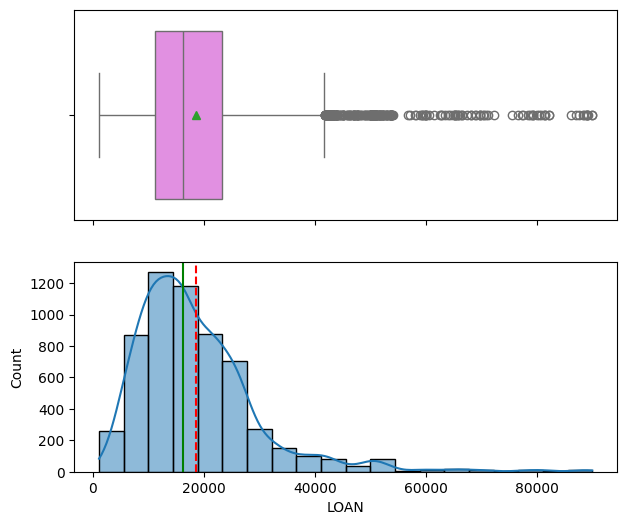

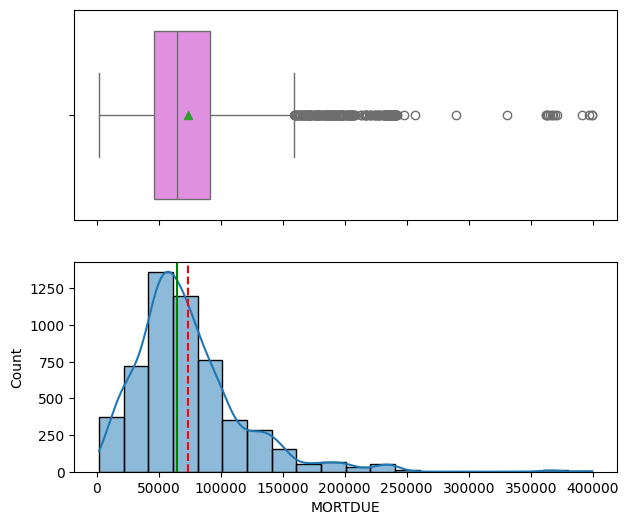

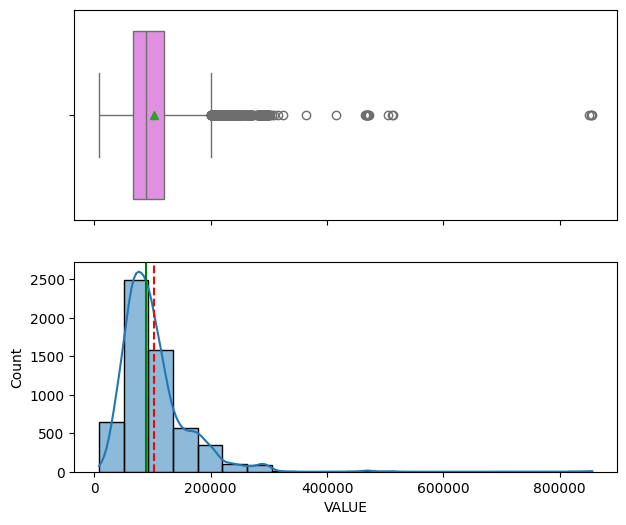

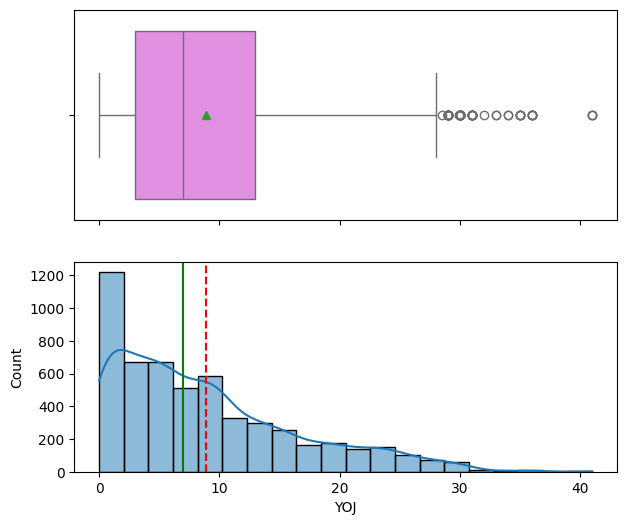

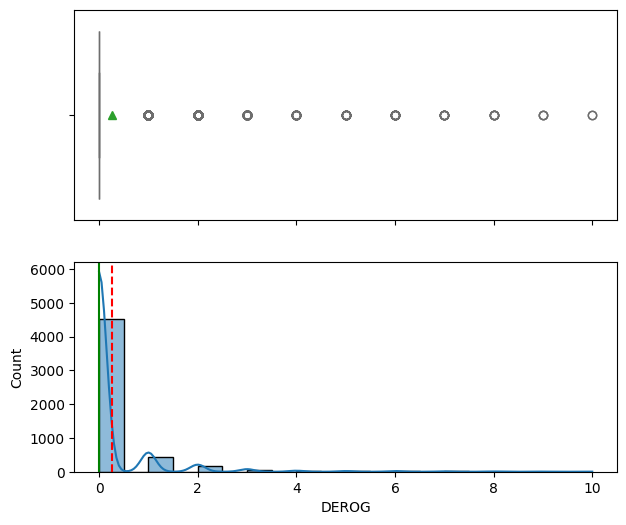

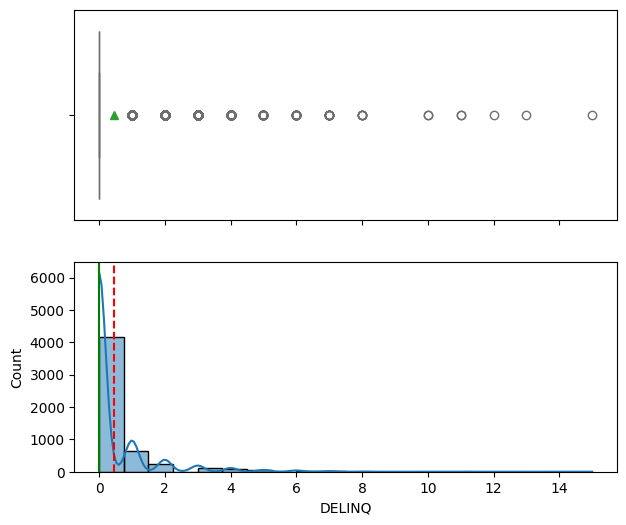

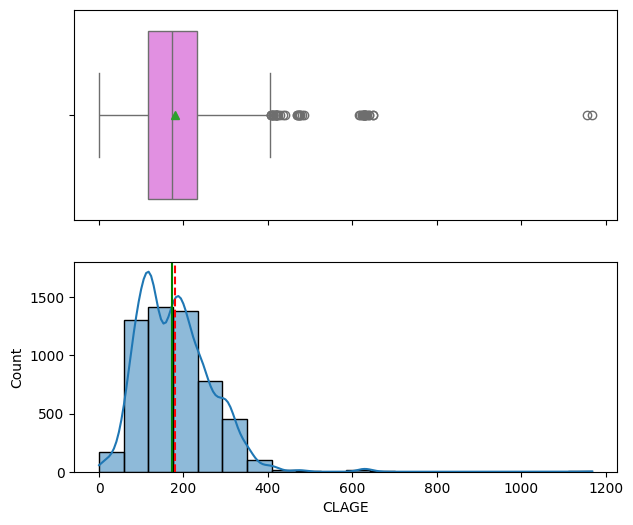

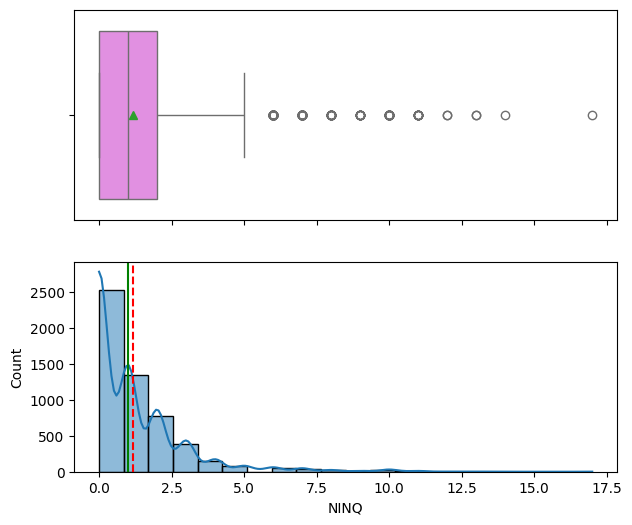

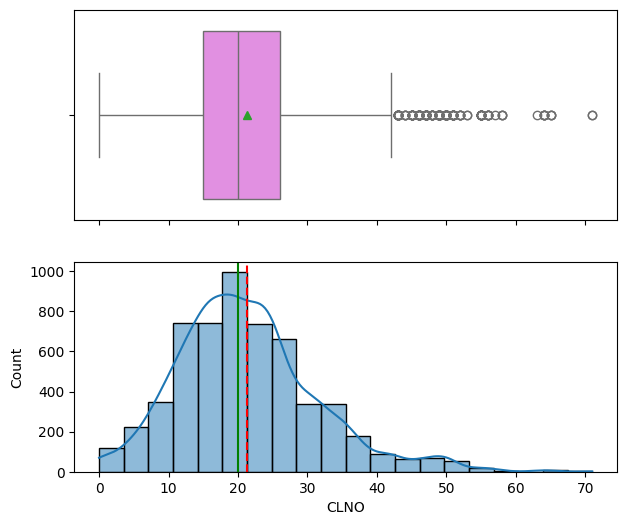

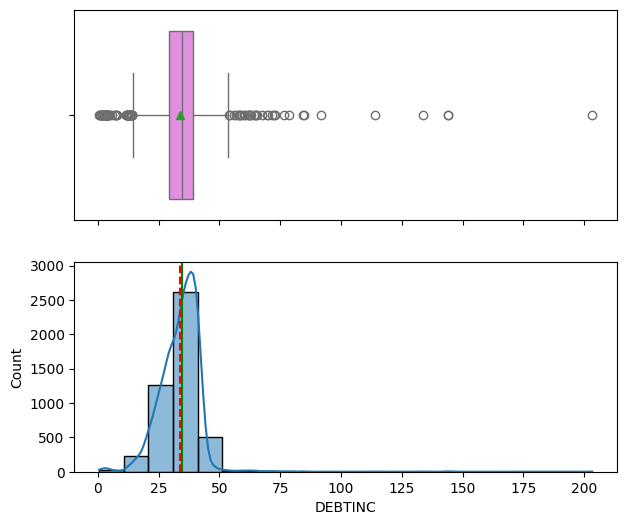

In [117]:
for i in num_cols:
  histogram_boxpolt(data, i, bins=20)

### **1.3. Univariate Analysis - Categorical Data**

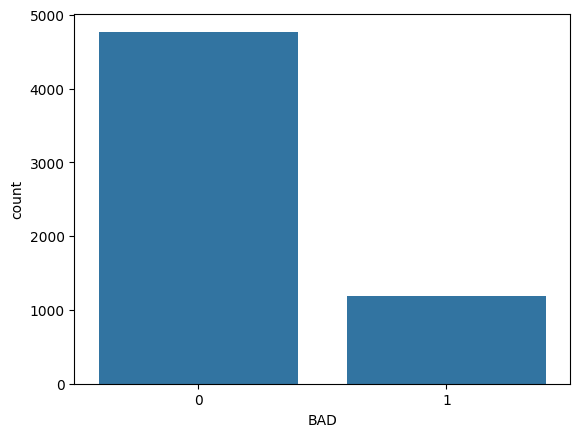

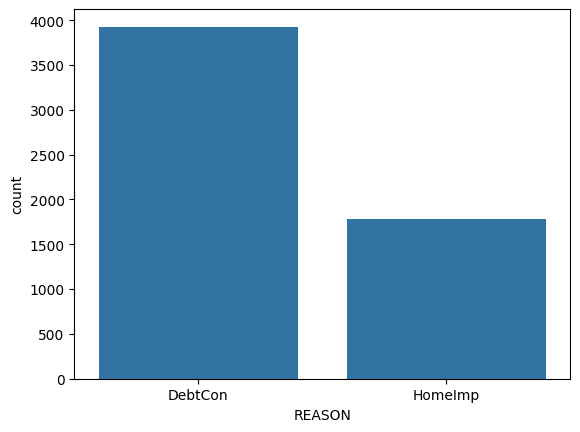

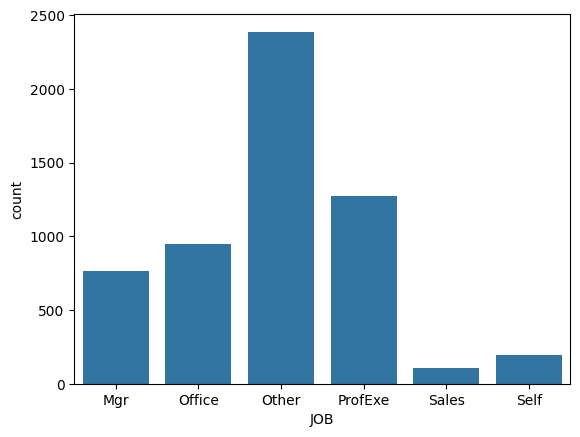

In [118]:
for i in cols_cat:
  sns.countplot(data=data, x=i)
  plt.show()

**Insights**

  1. The variable LOAN has a skewed distribution to the right with lot of big outliers compared to the mean.
  2. The variable MORTDUE has a skewed distribution to the right with lot of big outliers compared to the mean.
  3. The variable VALUE is slightly skewed to the right with many oultiers.
  4. The variable YOG is very skewed to the right and has a few outliers.
  5. The variable DEROG and DELINQ are discrete and are skewed to the right with some outliers.
  6. The variable CLAGE seems to follow a distribution normally shaped with two modes.
  7. The variable NINQ is skewed to the right with some outliers.
  8. The variable CLNO follows a normal shape distribution slightly skewed to the right.
  8. The variable DEBTINC follows a normal shape distribution with outliers at both sides.
  9. The other two variables REASON and BAD are just 80-20 and 70-30 respectively.
  10. BAD variable, which is target which have two vaules, 1 to be candidate is default and we see candidate  default rate is less.



### **4.2 Bivariate Analysis**

### **4.2.1 Function for stacked bar char**

In [119]:
from inspect import FrameInfo
def stacked_barplot(data, predictor, target):
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predictor], data[target]).sort_values(by=sorter, ascending=False)
  print(tab1)
  print('\n\n')
  tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
  tab.plot(kind='bar', stacked=True, figsize=(count+1, 5))
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon = False)
#  sns.boxplot(x=predictor, y=target, data=data, order=data[predictor].unique())

### 4.2.2. **Bivariate Analysis: Continuous**`

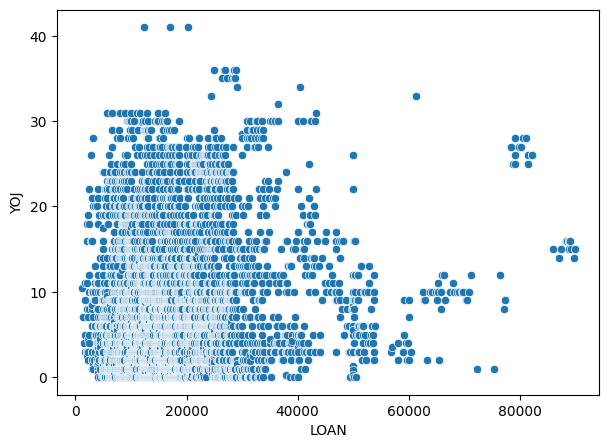

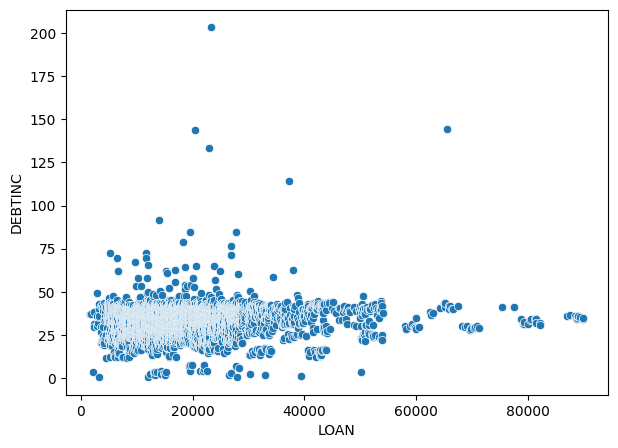

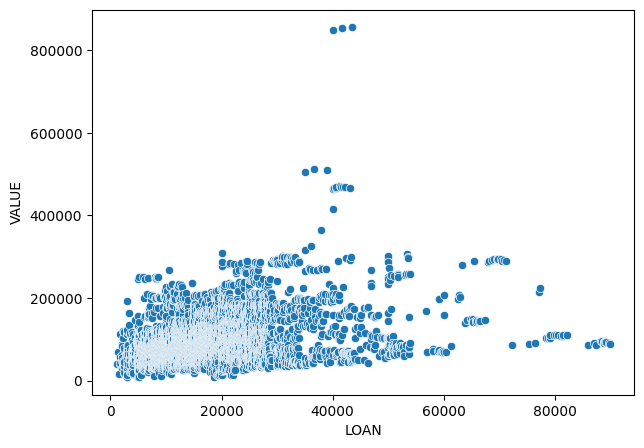

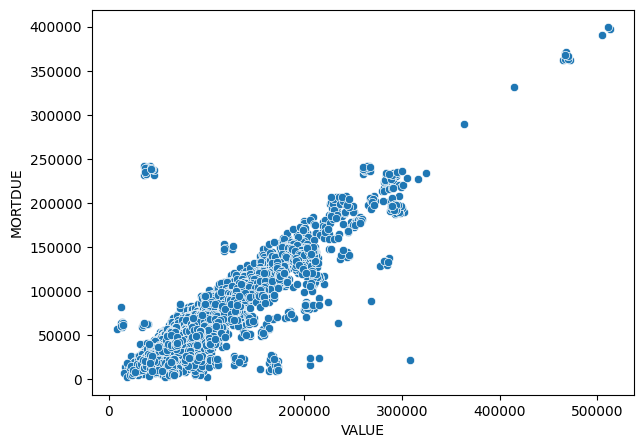

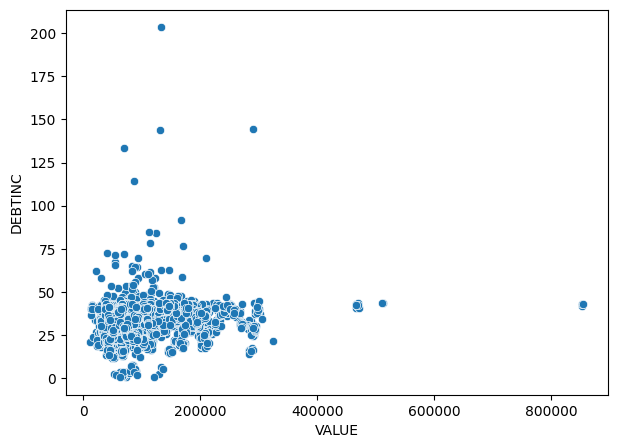

In [120]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="LOAN", y='YOJ', data=data, palette="PuBu")

plt.figure(figsize=(7,5))
sns.scatterplot(x="LOAN", y='DEBTINC', data=data, palette="PuBu")

plt.figure(figsize=(7,5))
sns.scatterplot(x="LOAN", y='VALUE', data=data, palette="PuBu")

plt.figure(figsize=(7,5))
sns.scatterplot(x="VALUE", y='MORTDUE', data=data, palette="PuBu")

plt.figure(figsize=(7,5))
sns.scatterplot(x="VALUE", y='DEBTINC', data=data, palette="PuBu")
plt.show()


In [121]:
data[num_cols].corr()

LOAN  MORTDUE  VALUE    YOJ  DEROG  DELINQ  CLAGE   NINQ  CLNO  \
LOAN     1.000    0.229  0.335  0.106 -0.001  -0.035  0.089  0.044 0.073   
MORTDUE  0.229    1.000  0.876 -0.088 -0.050  -0.001  0.140  0.031 0.324   
VALUE    0.335    0.876  1.000  0.008 -0.049  -0.014  0.171 -0.004 0.269   
YOJ      0.106   -0.088  0.008  1.000 -0.066   0.038  0.202 -0.072 0.025   
DEROG   -0.001   -0.050 -0.049 -0.066  1.000   0.212 -0.083  0.174 0.062   
DELINQ  -0.035   -0.001 -0.014  0.038  0.212   1.000  0.022  0.068 0.165   
CLAGE    0.089    0.140  0.171  0.202 -0.083   0.022  1.000 -0.117 0.238   
NINQ     0.044    0.031 -0.004 -0.072  0.174   0.068 -0.117  1.000 0.088   
CLNO     0.073    0.324  0.269  0.025  0.062   0.165  0.238  0.088 1.000   
DEBTINC  0.085    0.155  0.132 -0.056  0.017   0.052 -0.046  0.141 0.186   

         DEBTINC  
LOAN       0.085  
MORTDUE    0.155  
VALUE      0.132  
YOJ       -0.056  
DEROG      0.017  
DELINQ     0.052  
CLAGE     -0.046  
NINQ       0.141  
CLNO       0.186  
DEBTINC    1.000

In [122]:
data2 = data[num_cols].copy()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   int64  
 1   MORTDUE  5442 non-null   float64
 2   VALUE    5848 non-null   float64
 3   YOJ      5445 non-null   float64
 4   DEROG    5252 non-null   float64
 5   DELINQ   5380 non-null   float64
 6   CLAGE    5652 non-null   float64
 7   NINQ     5450 non-null   float64
 8   CLNO     5738 non-null   float64
 9   DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 465.8 KB


### **4.2.1 Bivariate Analysis: Categorical Variables**

BAD         0    1
REASON            
DebtCon  3183  745
HomeImp  1384  396





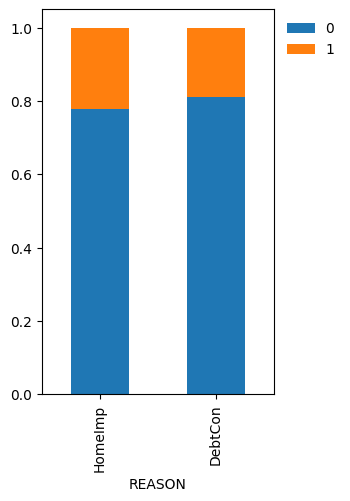

In [123]:
stacked_barplot(data, 'REASON', 'BAD')

BAD         0    1
JOB               
Other    1834  554
ProfExe  1064  212
Mgr       588  179
Office    823  125
Self      135   58
Sales      71   38





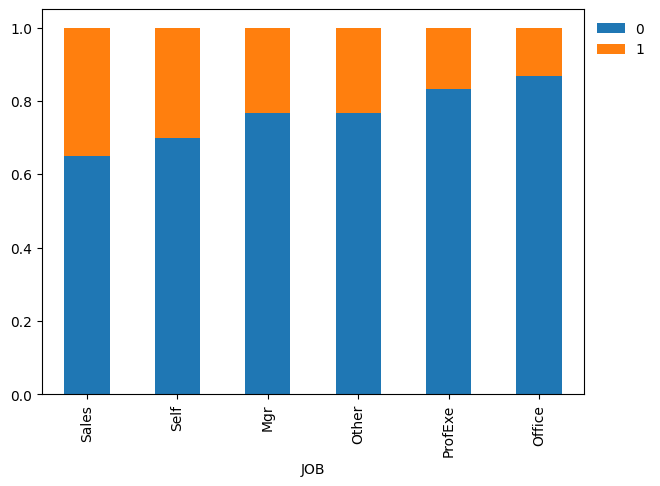

In [124]:
stacked_barplot(data, 'JOB', 'BAD')

**Insights:**

1. There is a linear correlation between the variables VALUE and MORTDUE.
2. The reason becomeing default in Reason & BAD, HomeLoad reason is slight lower than the DebtCon
3. Default ratio is high in Office Job type, followed by ProfExe, other, Mgr.. etc

### **4.3 Multivariate Analysis**

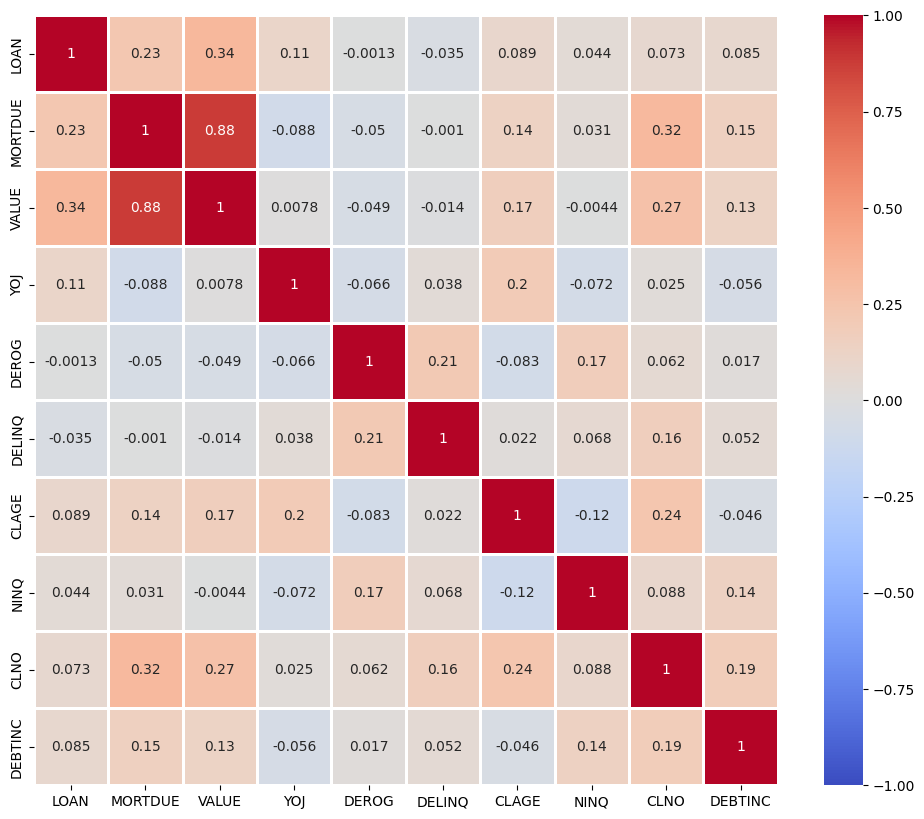

In [125]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data2.corr(), annot=True, vmin=-1, vmax=1,cmap='coolwarm', linewidths=1)
plt.show()

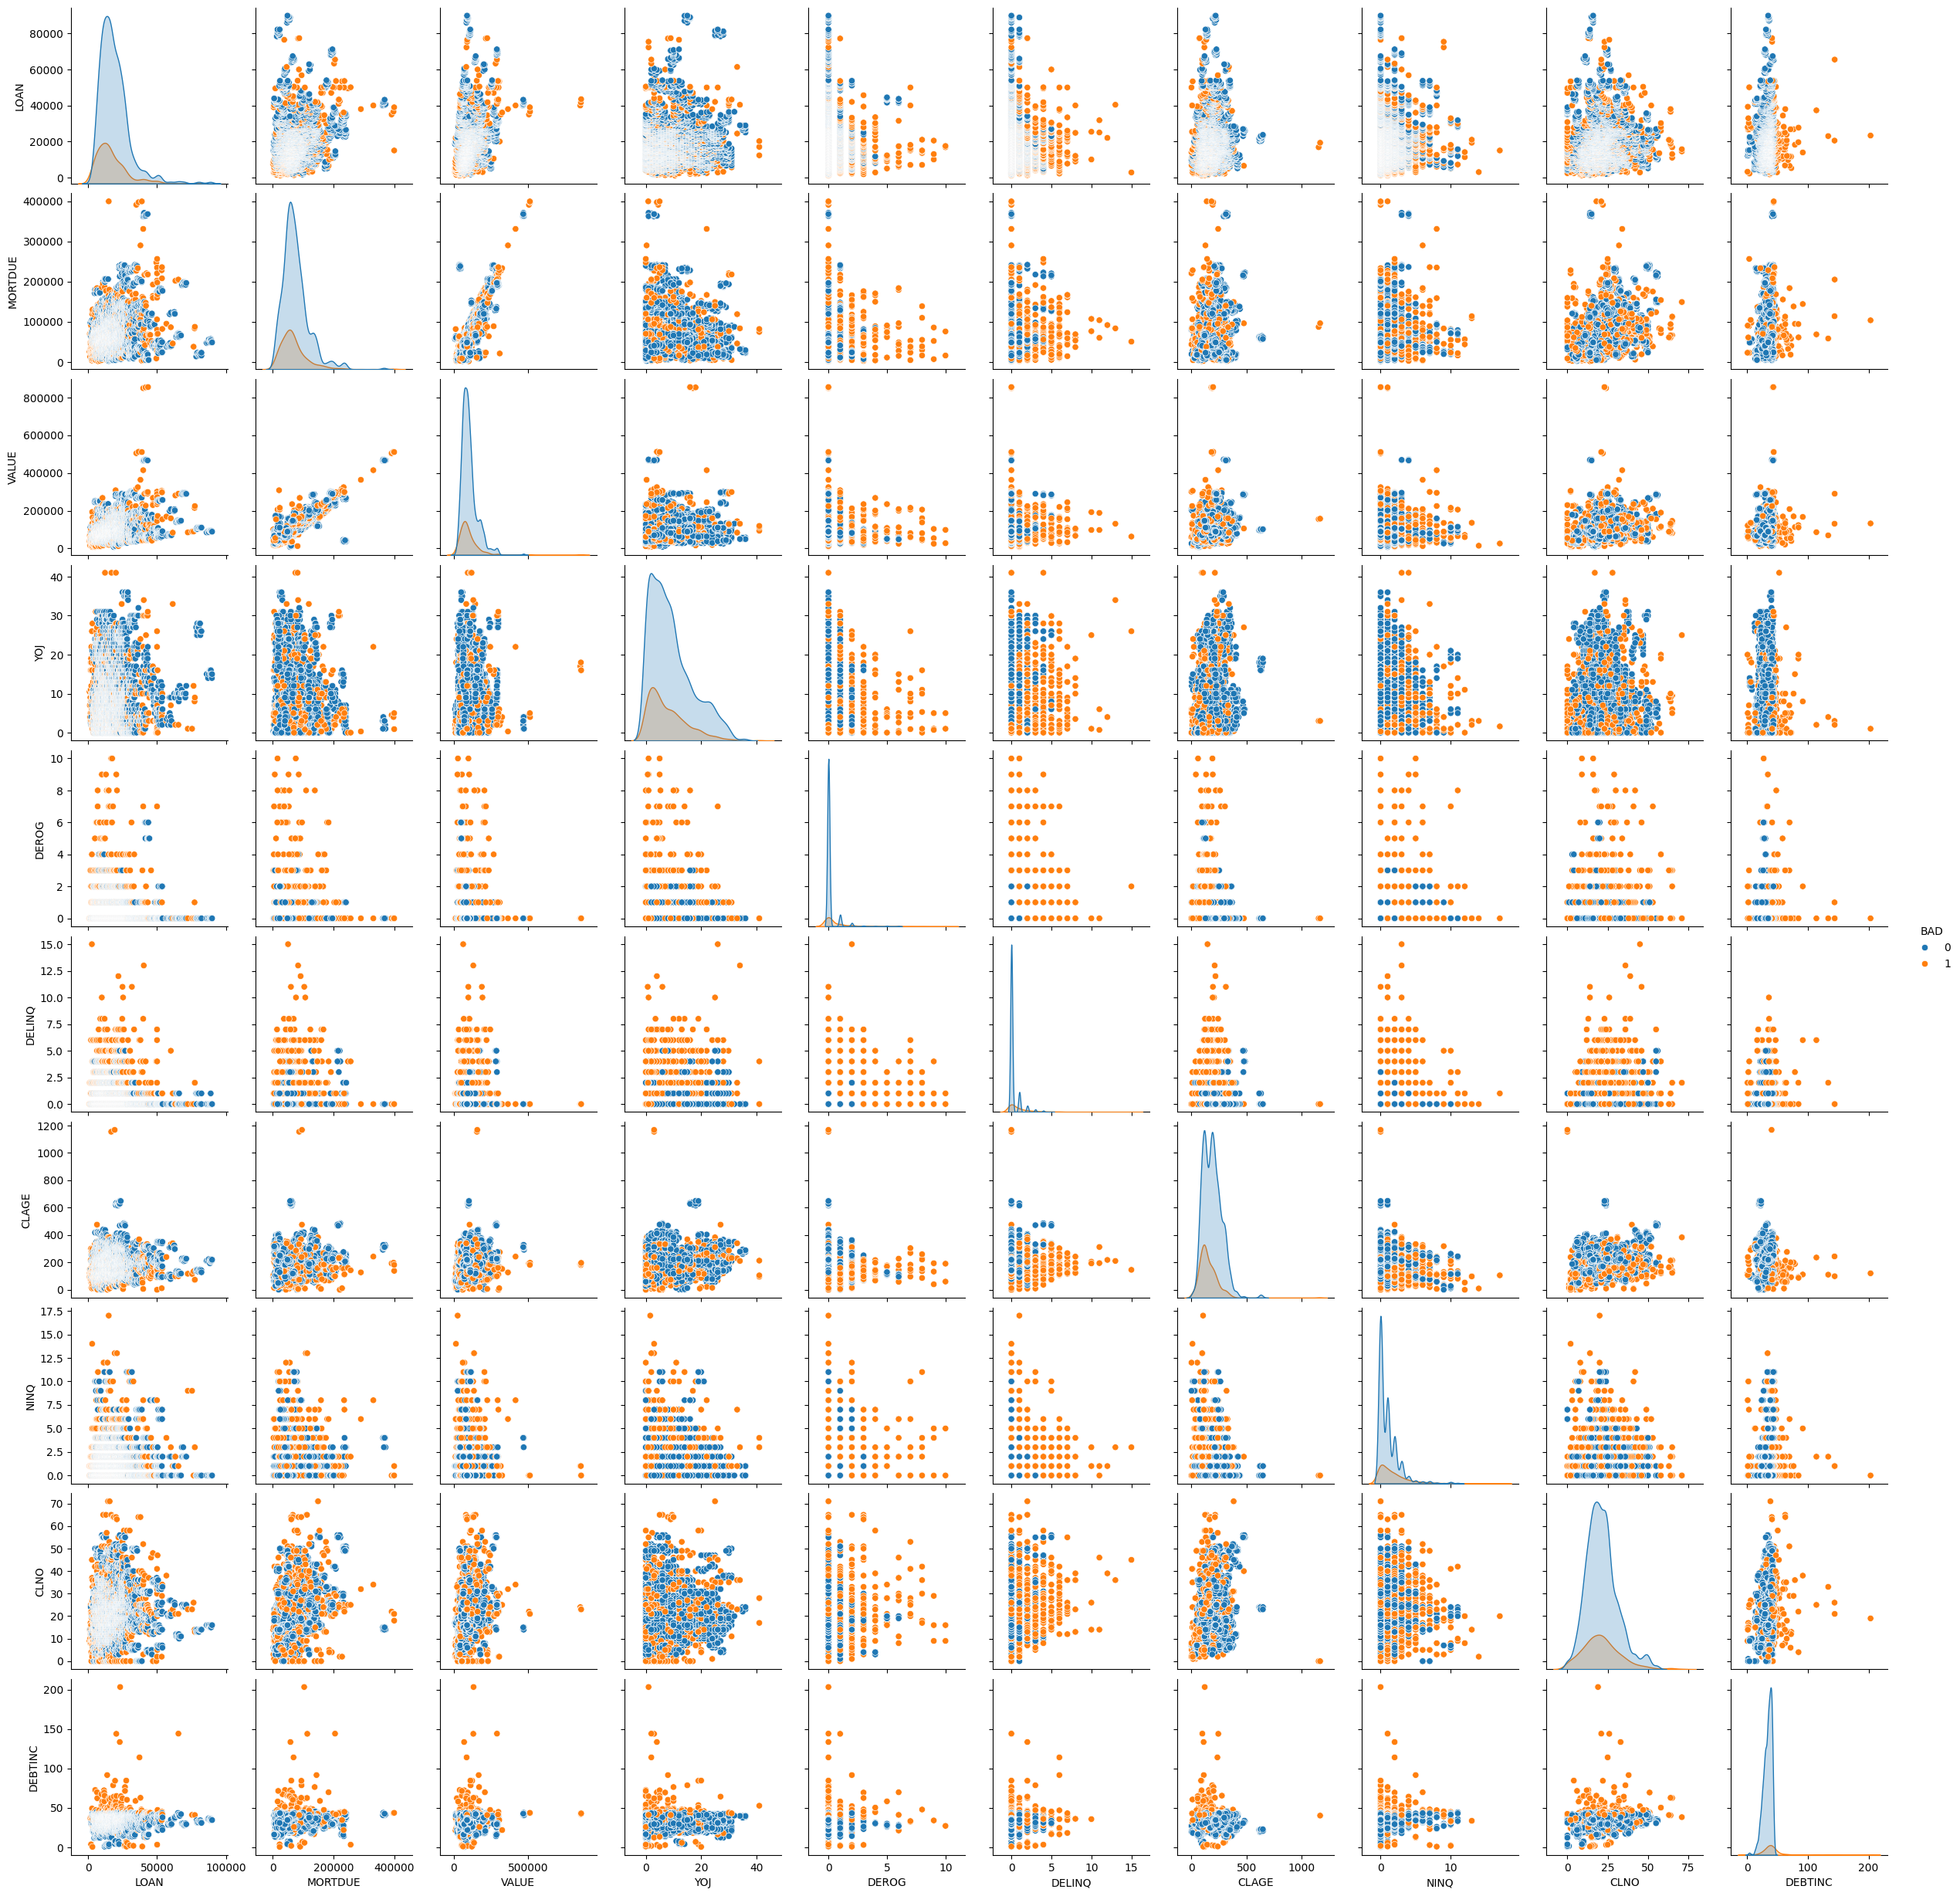

In [126]:
sns.pairplot(data, hue="BAD")

# **5. Handling Missing Values**

In [127]:
# Check for NaN values
print("NaN values in the dataset:")
print(data.isna().sum())

NaN values in the dataset:
BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [128]:
#Splitting the features and target
X = data.drop('BAD', axis=1)
y = data['BAD']

In [129]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [130]:
# Prepare preprocessing pipeline to handle NaN values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [131]:
# Prepare preprocessing pipeline to handle NaN values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [132]:
# Fit and transform the data
X_imputed = preprocessor.fit_transform(X)
new_data = data.copy()
new_data[numerical_cols] = X_imputed[:, :len(numerical_cols)]
new_data[categorical_cols] = X_imputed[:, len(numerical_cols):]

In [133]:
new_data.head()

BAD     LOAN   MORTDUE      VALUE   REASON      JOB    YOJ DEROG DELINQ  \
0   1 1100.000 25860.000  39025.000  HomeImp    Other 10.500 0.000  0.000   
1   1 1300.000 70053.000  68400.000  HomeImp    Other  7.000 0.000  2.000   
2   1 1500.000 13500.000  16700.000  HomeImp    Other  4.000 0.000  0.000   
3   1 1500.000 65019.000  89235.500  missing  missing  7.000 0.000  0.000   
4   0 1700.000 97800.000 112000.000  HomeImp   Office  3.000 0.000  0.000   

    CLAGE  NINQ   CLNO DEBTINC  
0  94.367 1.000  9.000  34.818  
1 121.833 0.000 14.000  34.818  
2 149.467 1.000 10.000  34.818  
3 173.467 1.000 20.000  34.818  
4  93.333 0.000 14.000  34.818

In [134]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   object  
 2   MORTDUE  5960 non-null   object  
 3   VALUE    5960 non-null   object  
 4   REASON   5960 non-null   object  
 5   JOB      5960 non-null   object  
 6   YOJ      5960 non-null   object  
 7   DEROG    5960 non-null   object  
 8   DELINQ   5960 non-null   object  
 9   CLAGE    5960 non-null   object  
 10  NINQ     5960 non-null   object  
 11  CLNO     5960 non-null   object  
 12  DEBTINC  5960 non-null   object  
dtypes: category(1), object(12)
memory usage: 564.8+ KB


# **6. Data Preparation**

## Separating the target variable from other **variables**

In [135]:
# Separating the target variable and other variables
y = new_data['BAD']
X = new_data.drop(columns = ['BAD'])

# Creating dummy variables for the categorical variables

# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True)

In [136]:
X.describe().T

count   unique       top     freq
LOAN           5960.000  540.000 15000.000  105.000
MORTDUE        5960.000 5054.000 65019.000  518.000
VALUE          5960.000 5382.000 89235.500  112.000
YOJ            5960.000   99.000     7.000  759.000
DEROG          5960.000   11.000     0.000 5235.000
DELINQ         5960.000   14.000     0.000 4759.000
CLAGE          5960.000 5314.000   173.467  310.000
NINQ           5960.000   16.000     0.000 2531.000
CLNO           5960.000   62.000    20.000  453.000
DEBTINC        5960.000 4693.000    34.818 1268.000
REASON_HomeImp     5960        2     False     4180
REASON_missing     5960        2     False     5708
JOB_Office         5960        2     False     5012
JOB_Other          5960        2     False     3572
JOB_ProfExe        5960        2     False     4684
JOB_Sales          5960        2     False     5851
JOB_Self           5960        2     False     5767
JOB_missing        5960        2     False     5681

## **Scaling the data**

In [137]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [138]:
X_scaled.head()

LOAN  MORTDUE  VALUE    YOJ  DEROG  DELINQ  CLAGE   NINQ   CLNO  DEBTINC  \
0 -1.562   -1.108 -1.099  0.240 -0.281  -0.376 -1.018 -0.103 -1.231    0.107   
1 -1.544   -0.069 -0.583 -0.242 -0.281   1.477 -0.689 -0.708 -0.728    0.107   
2 -1.527   -1.398 -1.492 -0.655 -0.281  -0.376 -0.359 -0.103 -1.130    0.107   
3 -1.527   -0.188 -0.216 -0.242 -0.281  -0.376 -0.071 -0.103 -0.125    0.107   
4 -1.509    0.583  0.184 -0.793 -0.281  -0.376 -1.030 -0.708 -0.728    0.107   

   REASON_HomeImp  REASON_missing  JOB_Office  JOB_Other  JOB_ProfExe  \
0           1.532          -0.210      -0.435      1.223       -0.522   
1           1.532          -0.210      -0.435      1.223       -0.522   
2           1.532          -0.210      -0.435      1.223       -0.522   
3          -0.653           4.759      -0.435     -0.818       -0.522   
4           1.532          -0.210       2.299     -0.818       -0.522   

   JOB_Sales  JOB_Self  JOB_missing  
0     -0.136    -0.183       -0.222  
1     -0.136    -0.183       -0.222  
2     -0.136    -0.183       -0.222  
3     -0.136    -0.183        4.512  
4     -0.136    -0.183       -0.222

In [139]:
y1 = y.astype('int')

In [140]:
y1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5960 entries, 0 to 5959
Series name: BAD
Non-Null Count  Dtype
--------------  -----
5960 non-null   int64
dtypes: int64(1)
memory usage: 46.7 KB


## Splitting the data

In [141]:
X_train, X_test, y_train, y_test =train_test_split(X_scaled, y1, test_size=0.2, shuffle=True, random_state=42)

In [142]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4768, 18), (1192, 18), (4768,), (1192,))

# **7. Model Evaluation Section**

In [192]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [193]:
def adj_r2_score(predictors, target, predictions):
  r2 = r2_score(target, predictions)
  n = X_train.shape[0]
  k = X_train.shape[1]
  return 1 - (1-r2)*(n-1)/(n-k-1)

In [194]:
def mape_score(target, predictions):
  return np.mean(np.abs((target - predictions) / target)) * 100

In [195]:
def model_performance_regression(model, predictors, target):
  pred = model.predict(predictors)
  r2 = r2_score(target, pred)
  rmse = np.sqrt(mean_squared_error(target, pred))
  adjr2 = adj_r2_score(predictors, target, pred)
  mae = mean_absolute_error(target, pred)
  mape = mape_score(target, pred)

  df_pref = pd.DataFrame(
      {
        "Roor Mean Square Error": rmse,
        "R-Squared": r2,
        "Adjusted R-Squared": adjr2,
        "Mean Absolute Error": mae,
        "Mean Absolute Percentage Error": mape
      },
      index=[0]
  )
  return df_pref

## **Model Build: Logistic Regression Model**

In [196]:
# Defining the Logistic regression model
lg_regressor  = LogisticRegression()

# Fitting the model on the training data
lg_regressor.fit(X_train, y_train)

LogisticRegression()

### **checking the performance on the training dataset**

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3340
           1       0.72      0.32      0.44       832

    accuracy                           0.84      4172
   macro avg       0.79      0.64      0.67      4172
weighted avg       0.83      0.84      0.81      4172



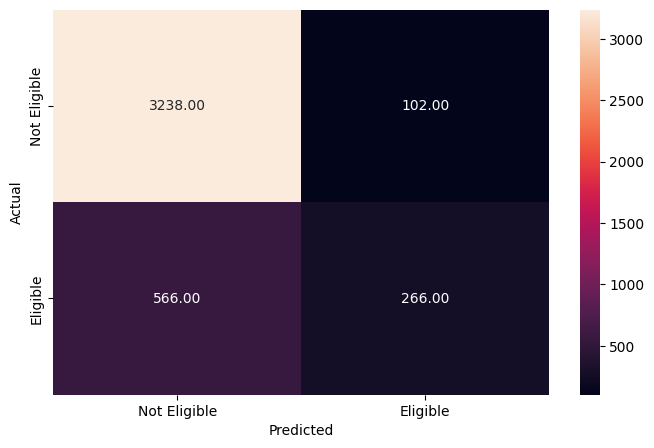

In [197]:
#predicting for train set
y_pred_train = lg_regressor.predict(X_train)
y_pred_train
metrics_score(y_train, y_pred_train)

### **Checking the performance on the test dataset**

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1431
           1       0.70      0.33      0.45       357

    accuracy                           0.84      1788
   macro avg       0.78      0.65      0.68      1788
weighted avg       0.82      0.84      0.81      1788



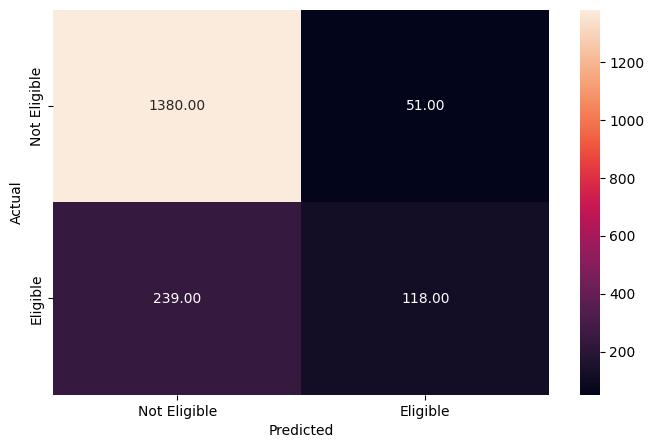

In [227]:
#predicting for test set
y_pred_test = lg_regressor.predict(X_test)
y_pred_test
lg_class_perf_test = metrics_score(y_test, y_pred_test)


**Observations:**

- **We are getting an accuracy of about 80%** on the train and the test datasets.
- However, **the recall for this model is only around 3.2% for class 1 on the train data and 3.3% on the test data.**
- As the recall is low, **this model will not perform well** in differentiating out clients who have a high chance of defaulting the loan, meaning it will eventually not help in increasing the bank income.
- As we can see from the Confusion Matrix, **this model is not good at identifying clients who are at risk of defaulting.**

In [226]:
lg_class_perf_test

## **Model Build: Decision Tree Model**

#### Split the data

In [199]:
# Split the data into training and test set (We use Stratify = 1 because data is unbalanced)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size = 0.3, random_state = 1, stratify = y)

In [200]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4172, 18), (1788, 18), (4172,), (1788,))

In [243]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dt_classifier = DecisionTreeClassifier(random_state=1)


In [245]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



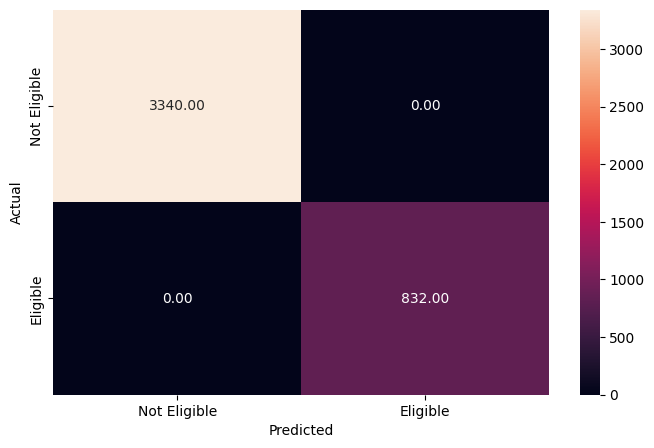

In [203]:
y_train_pred_dt = dt_classifier.predict(X_train)
y_train_pred_dt
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1431
           1       0.73      0.67      0.70       357

    accuracy                           0.88      1788
   macro avg       0.82      0.80      0.81      1788
weighted avg       0.88      0.88      0.88      1788



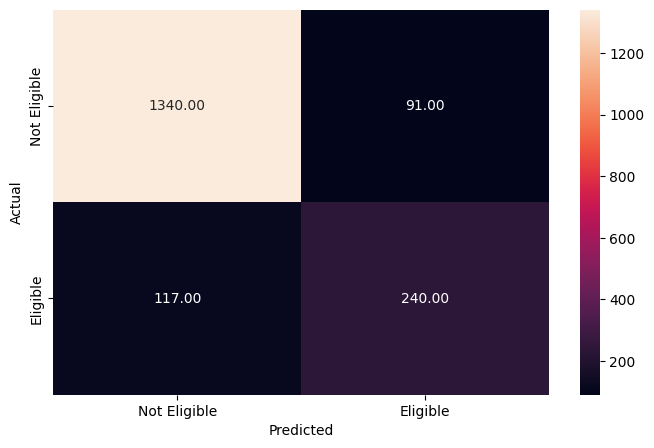

In [204]:
y_test_pred_dt = dt_classifier.predict(X_test)
y_test_pred_dt
dt_class_perf_test = metrics_score(y_test, y_test_pred_dt)
dt_class_perf_test

**Insights**

  1. The Decision Tree works well on the training data but not so well on the test data as the recall is 0.67 in comparison to 1.00 for the training dataset, i.e., the Decision Tree is overfitting the training data.
  2. The precision on the test data suggests that there's a 27% (1 - 0.73) chance that the model will predict that a client is going to default even though he/she would not (false positive), increasing the risk for the bank to loses income.
  3. The recall in this model is greater than in logistical regression: 0.62 vs. 0.32.



## **Model Build: RandomForest Regression**

In [205]:
# Split the data into training and test set (We use Stratify = 1 because data is unbalanced)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size = 0.3, random_state = 42, stratify = y)

In [206]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4172, 18), (1788, 18), (4172,), (1788,))

In [207]:
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



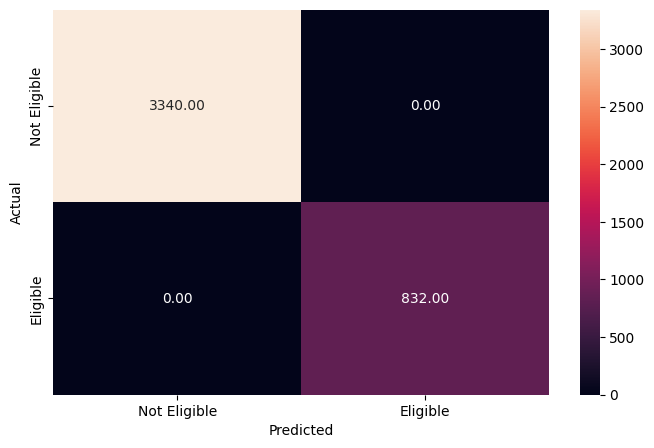

In [208]:
y_train_pred_rf = rf_classifier.predict(X_train)
y_train_pred_rf

metrics_score(y_train, y_train_pred_rf)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1431
           1       0.85      0.64      0.73       357

    accuracy                           0.91      1788
   macro avg       0.88      0.81      0.84      1788
weighted avg       0.90      0.91      0.90      1788



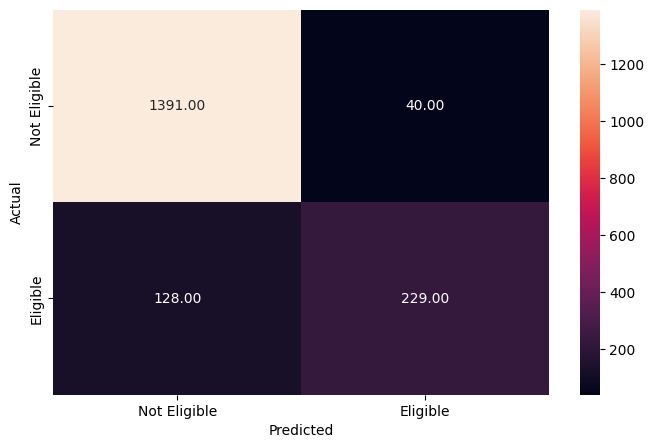

In [209]:
y_test_pred_rf = rf_classifier.predict(X_test)
y_test_pred_rf

rf_class_perf_test = metrics_score(y_test, y_test_pred_rf)
rf_class_perf_test

**Observations**:

  1. The Random Forest classifier seems to be overfitting the training data.
  2. The recall on the training data is 1, while the recall on the test data is only 0.64 for class 1.
  3. Precision is high for the test data as well.



## **Random Forest Model: Hyperparameter Tuning**

In [210]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

### Hyperparameter Tuning- **RandomizedSearchCV**

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import ParameterGrid


# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Print the best estimator
print(random_search.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


In [212]:
 #Split the data into training and test set (We use Stratify = 1 because data is unbalanced)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size = 0.3, random_state = 42, stratify = y)

In [213]:
rf_classifier_RCV_tuned = RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)
rf_classifier_RCV_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



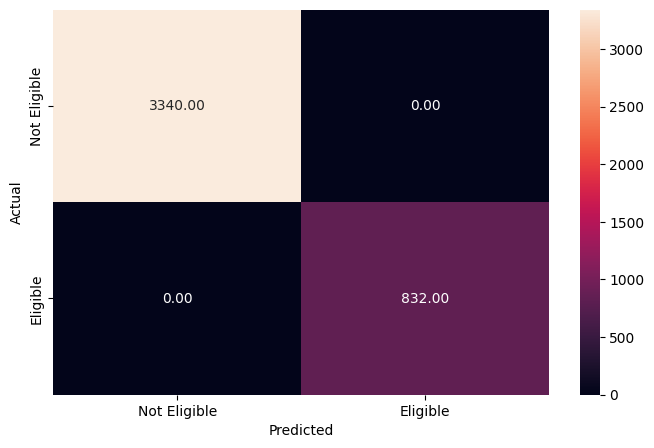

In [214]:
y_train_pred_rf_RCV_tuned = rf_classifier.predict(X_train)
y_train_pred_rf_RCV_tuned

metrics_score(y_train, y_train_pred_rf_RCV_tuned)


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1431
           1       0.85      0.64      0.73       357

    accuracy                           0.91      1788
   macro avg       0.88      0.81      0.84      1788
weighted avg       0.90      0.91      0.90      1788



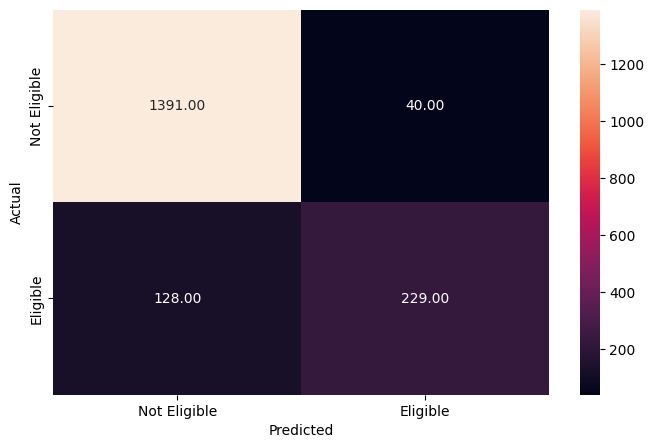

In [215]:
y_test_pred_rf_RCV_tuned = rf_classifier.predict(X_test)
y_test_pred_rf_RCV_tuned

rf_class_RCV_perf_test = metrics_score(y_test, y_test_pred_rf_RCV_tuned)

**Observations**:

  1. The Random Forest classifier with RandomizedSearchCV Tunning seems to be overfitting the training data.
  2. The recall on the training data is 1, while the recall on the test data is only 0.64 for class 1 (lower than the RandomForestClassifier before tunning).
  3. Precision is high for the test data as well.



### **Hyperparameter Tuning- GridSearchCV**

In [216]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9)


In [217]:
 #Split the data into training and test set (We use Stratify = 1 because data is unbalanced)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size = 0.3, random_state = 42, stratify = y)

In [218]:
rf_classifier_GCV_tuned = RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       )
rf_classifier_GCV_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



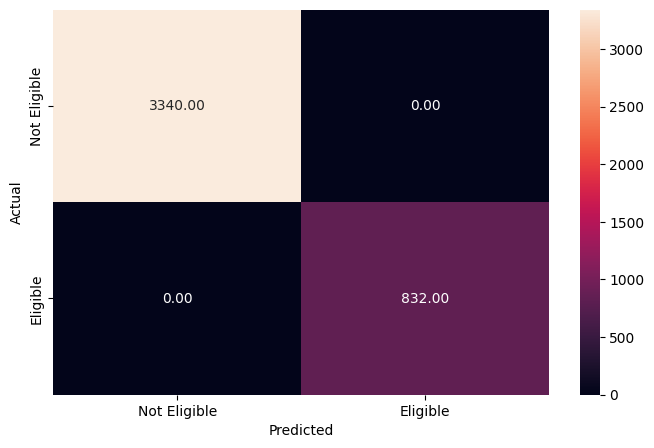

In [219]:
y_train_pred_rf_GCV_tuned = rf_classifier.predict(X_train)
y_train_pred_rf_GCV_tuned

metrics_score(y_train, y_train_pred_rf_GCV_tuned)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1431
           1       0.85      0.64      0.73       357

    accuracy                           0.91      1788
   macro avg       0.88      0.81      0.84      1788
weighted avg       0.90      0.91      0.90      1788



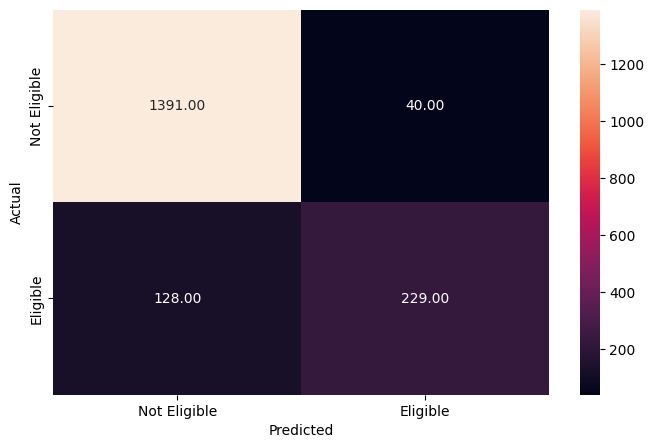

In [220]:
y_test_pred_rf_tuned = rf_classifier.predict(X_test)
y_test_pred_rf_tuned

rf_class_gcv_perf_test = metrics_score(y_test, y_test_pred_rf_tuned)
rf_class_gcv_perf_test

**Observations**:

  1. The Random Forest classifier with RandomizedSearchCV Tunning seems to be overfitting the training data.
  2. The recall on the training data is 1, while the recall on the test data is only 0.64 for class 1 (lower than the RandomForestClassifier before tunning).
  3. Precision is high for the test data as well.
  4. Ideally their is no much difference in both tuned RandomForest models in comparision with RandomForest Classifier.

# ==== to be updated

In [222]:
dt_regressor_visualize = DecisionTreeRegressor(random_state=1, max_depth=5)
dt_regressor_visualize.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=1)

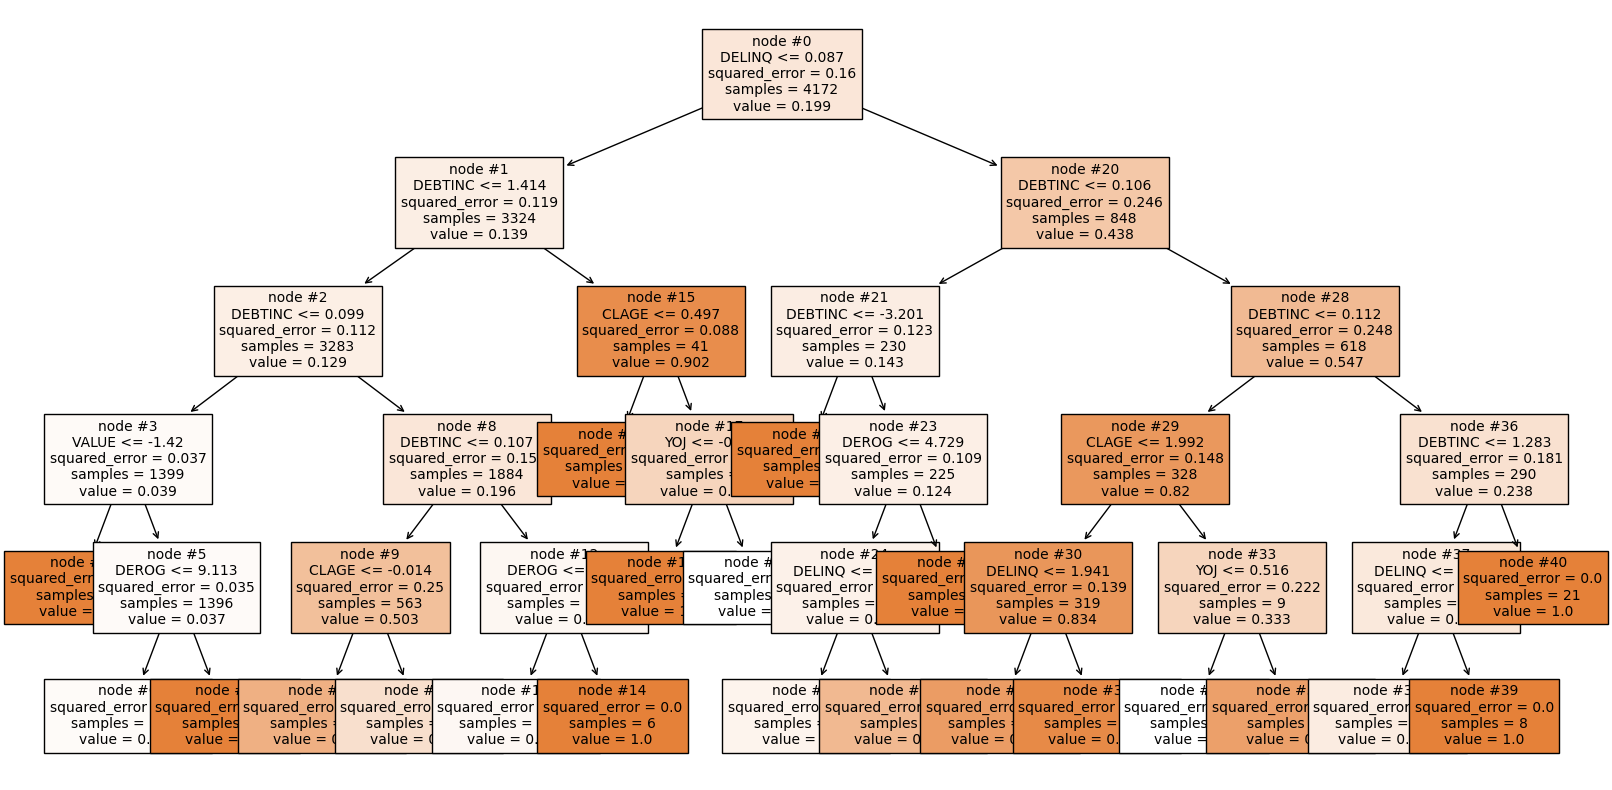

In [223]:
from sklearn import tree
features = X_scaled.columns
plt.figure(figsize=(20,10))
tree.plot_tree(dt_regressor_visualize, feature_names=features, filled=True, fontsize=10, node_ids=True)
plt.show()

#  **Comparing Model Performances**

In [237]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, precision, recall

def compare_confusion_matrices(models, X_train, y_train, X_test, y_test):
    results = []
    for name, model in models.items():
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_accuracy, train_precision, train_recall = calculate_metrics(y_train, y_train_pred)
        test_accuracy, test_precision, test_recall = calculate_metrics(y_test, y_test_pred)

        results.append({
            'Model': name,
            'Train_Accuracy': train_accuracy,
            'Test_Accuracy': test_accuracy,
            'Train_Recall': train_recall,
            'Test_Recall': test_recall,
            'Train_Precision': train_precision,
            'Test_Precision': test_precision
        })

    df = pd.DataFrame(results)
    # Reorder columns to match the desired output
    df = df[['Model', 'Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall', 'Train_Precision', 'Test_Precision']]
    # Format float values to 6 decimal places
    float_cols = df.select_dtypes(include=['float64']).columns
    df[float_cols] = df[float_cols].applymap('{:.6f}'.format)
    return df

# Example usage:
models = {
    'Log_Regression': lg_regressor,
    'DT_Classifier': dt_classifier,
    'RF_Classifier': rf_classifier,
    'RF_Classifier_RCV' : rf_classifier_RCV_tuned,
    'RF_Classifier_GCV' : rf_classifier_GCV_tuned
}

comparison_df = compare_confusion_matrices(models, X_train, y_train, X_test, y_test)
print(comparison_df.to_string(index=False))

            Model Train_Accuracy Test_Accuracy Train_Recall Test_Recall Train_Precision Test_Precision
   Log_Regression       0.839885      0.837808     0.319712    0.330532        0.722826       0.698225
    DT_Classifier       0.967641      0.959172     0.912260    0.876751        0.924482       0.915205
    RF_Classifier       1.000000      0.906040     1.000000    0.641457        1.000000       0.851301
RF_Classifier_RCV       0.888303      0.875839     0.674279    0.638655        0.742063       0.710280
RF_Classifier_GCV       0.888303      0.875839     0.673077    0.638655        0.742706       0.710280


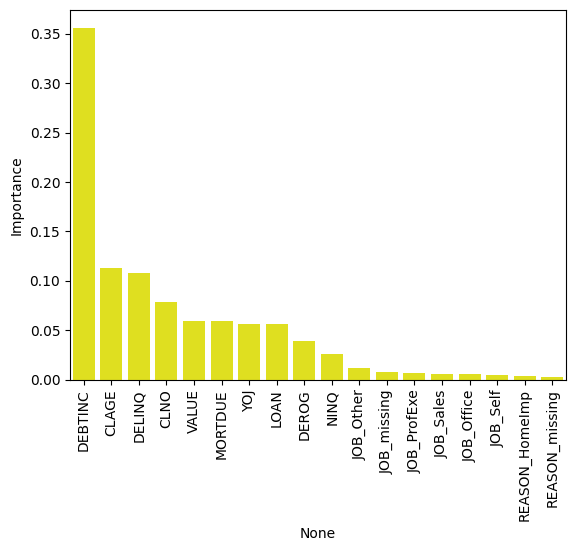

In [263]:
importances = dt_classifier.feature_importances_

columns = X_scaled.columns

# Fit the decision tree classifier to your data
#dtree_estimator.fit(X_train, y_train)  # Assuming y_train is your target variable

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


sns.barplot(x=importance_df.index, y=importance_df['Importance'], color='yellow')
plt.xticks(rotation=90)
plt.show()



### **Insights**

1. Models with the higher test accuracy are the Decision Tree and Random Forest Classifiers between 90 - 96
2. All models overfit the training data with the exception of the LGR.
3. The highest recall (~0.87) belongs to the Decision Tree. The others are similars.
4. Precision in Decision Tree Model is high (~.91).
6. After tuning the model we are getting that only 8 features are important. It seems like the model is having high bias, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
7. According to this model too, DEBTINC, DELINQ, CLAGE, DEROG, CLNO, MORTDUEand YOG are the most important features that describe why a client is defaulting.






